# Project Compiled By **Bappa Bhalsing**

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
import random
random.seed(0)
import warnings
warnings.filterwarnings("ignore")

### Change current working directory


In [ ]:
import os

os.chdir('/content/drive/My Drive/Colab Notebooks/Comp Vision/Project /Project 6/' )
path='.'

### Load the "images.npy" file 
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
data = np.load('images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file 
Hint - print data[10][1] 

In [ ]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### Set image dimensions
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [ ]:
X_train.shape

(409, 224, 224, 3)

In [ ]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.22352946 -0.20784312 -0.51372552]
  [ 0.28627455 -0.21568626 -0.51372552]
  [ 0.30980396 -0.23921567 -0.49803919]
  ...
  [ 0.94509804  0.7647059   0.25490201]
  [ 0.57647061  0.25490201 -0.15294117]
  [ 0.45882356  0.15294123 -0.15294117]]

 [[ 0.4039216  -0.09803921 -0.46666664]
  [ 0.27058828 -0.26274508 -0.53725493]
  [ 0.34117651 -0.1607843  -0.52156866]
  ...
  [ 0.74117649  0.4666667   0.15294123]
  [ 0.52941179  0.18431377 -0.16862744]
  [ 0.6156863   0.3176471   0.01176476]]

 [[ 0.32549024 -0.14509803 -0.47450978]
  [ 0.60000002  0.05882359 -0.372549  ]
  [ 0.87450981  0.27843142 -0.26274508]
  ...
  [ 0.56078434  0.27843142 -0.06666666]
  [ 0.3176471   0.04313731 -0.27058822]
  [ 0.63921571  0.34117651  0.03529418]]

 ...

 [[-0.44313723 -0.68627453 -0.89803922]
  [-0.29411763 -0.60784316 -0.84313726]
  [-0.23137254 -0.56862748 -0.89019608]
  ...
  [-0.58431375 -0.78039217 -0.85882354]
  [-0.63137257 -0.80392158 -0.88235295]
  [-0.372549   -0.41176468 -0.43529409]]

 [

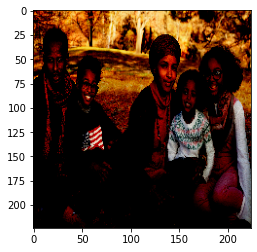

In [ ]:
from matplotlib import pyplot
n = 12
print(X_train[n])
pyplot.imshow(X_train[n])

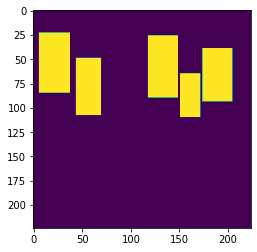

In [ ]:
pyplot.imshow(masks[n])

## Create the model

> Indented block


- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    b1 = model.get_layer("conv_pw_1_relu").output
    b2 = model.get_layer("conv_pw_2_relu").output
    b3 = model.get_layer("conv_pw_3_relu").output
    b4 = model.get_layer("conv_pw_4_relu").output
    b5 = model.get_layer("conv_pw_5_relu").output
    b6 = model.get_layer("conv_pw_6_relu").output
    b7 = model.get_layer("conv_pw_7_relu").output
    b8 = model.get_layer("conv_pw_8_relu").output
    b9 = model.get_layer("conv_pw_9_relu").output
    b10 = model.get_layer("conv_pw_10_relu").output
    b11 = model.get_layer("conv_pw_11_relu").output
    b12 = model.get_layer("conv_pw_12_relu").output
    b13 = model.get_layer("conv_pw_13_relu").output
        

    x = Concatenate()([UpSampling2D()(b13), b11])
    x = Concatenate()([UpSampling2D()(x), b5])
    x = Concatenate()([UpSampling2D()(x), b2])
    x = Concatenate()([UpSampling2D()(x), b1])
    x = UpSampling2D()(x)
    
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [ ]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [ ]:
model.fit(X_train, masks, epochs=10, batch_size=1, verbose=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/10
407/409 [============================>.] - ETA: 0s - loss: 1.1467 - dice_coefficient: 0.4943
Epoch 00001: loss improved from inf to 1.14948, saving model to model-1.15.h5
409/409 [==============================] - 10s 24ms/step - loss: 1.1495 - dice_coefficient: 0.4936 - lr: 0.0010
Epoch 2/10
408/409 [============================>.] - ETA: 0s - loss: 0.8668 - dice_coefficient: 0.5830
Epoch 00002: loss improved from 1.14948 to 0.86833, saving model to model-0.87.h5
409/409 [==============================] - 10s 24ms/step - loss: 0.8683 - dice_coefficient: 0.5826 - lr: 0.0010
Epoch 3/10
408/409 [============================>.] - ETA: 0s - loss: 0.8341 - dice_coefficient: 0.5987
Epoch 00003: loss improved from 0.86833 to 0.83447, saving model to model-0.83.h5
409/409 [==============================] - 10s 24ms/step - loss: 0.8345 - dice_coefficient: 0.5985 - lr: 0.0010
Epoch 4/10
407/409 [============================>.] - ETA: 0s - loss: 0.8124 - dice_coefficient: 0.6066
Epoch 

### Get the predicted mask for a sample image

1/1 [==============================] - 0s 1ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


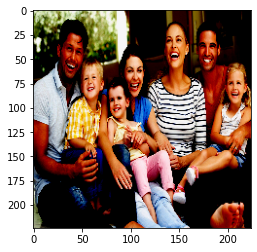

In [ ]:
n=187
sample_image= X_train[n]
predicted_mask = model.predict(x=np.array([sample_image]), verbose=1)
pyplot.imshow(sample_image)


### Impose the mask on the image

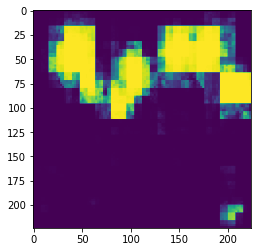

In [ ]:
pyplot.imshow(predicted_mask[0])

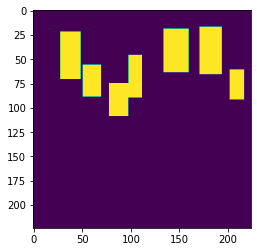

In [ ]:
pyplot.imshow(masks[n])